In [125]:
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv("train.csv")

In [127]:
df.shape

(9557, 143)

In [128]:
display(df.head)

<bound method NDFrame.head of                 Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjef

In [129]:
df.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [130]:
df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [131]:
df.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [132]:
df.Target.value_counts()/df.shape[0]*100

4    62.739353
2    16.710265
3    12.650413
1     7.899969
Name: Target, dtype: float64

## Missing Values

In [133]:
df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [134]:
df_NaN = pd.DataFrame(data = df.isnull().sum(), columns = ['Count_of_NaN'] )
print(df_NaN)
df_NaN['% NaN'] =  (df_NaN['Count_of_NaN']/df.shape[0])*100
df_NaN[df_NaN.sum(axis =1)>0]

                 Count_of_NaN
Id                          0
v2a1                     6860
hacdor                      0
rooms                       0
hacapo                      0
...                       ...
SQBovercrowding             0
SQBdependency               0
SQBmeaned                   5
agesq                       0
Target                      0

[143 rows x 1 columns]


,Count_of_NaN,% NaN
v2a1,6860,71.779847
v18q1,7342,76.823271
rez_esc,7928,82.954902
meaneduc,5,0.052318
SQBmeaned,5,0.052318


In [135]:
Missing_cols = df.columns[df.isnull().any()]

In [136]:
print('#of Missing Columns: {}'.format(len(Missing_cols)))

#of Missing Columns: 5


In [137]:
import missingno as msno

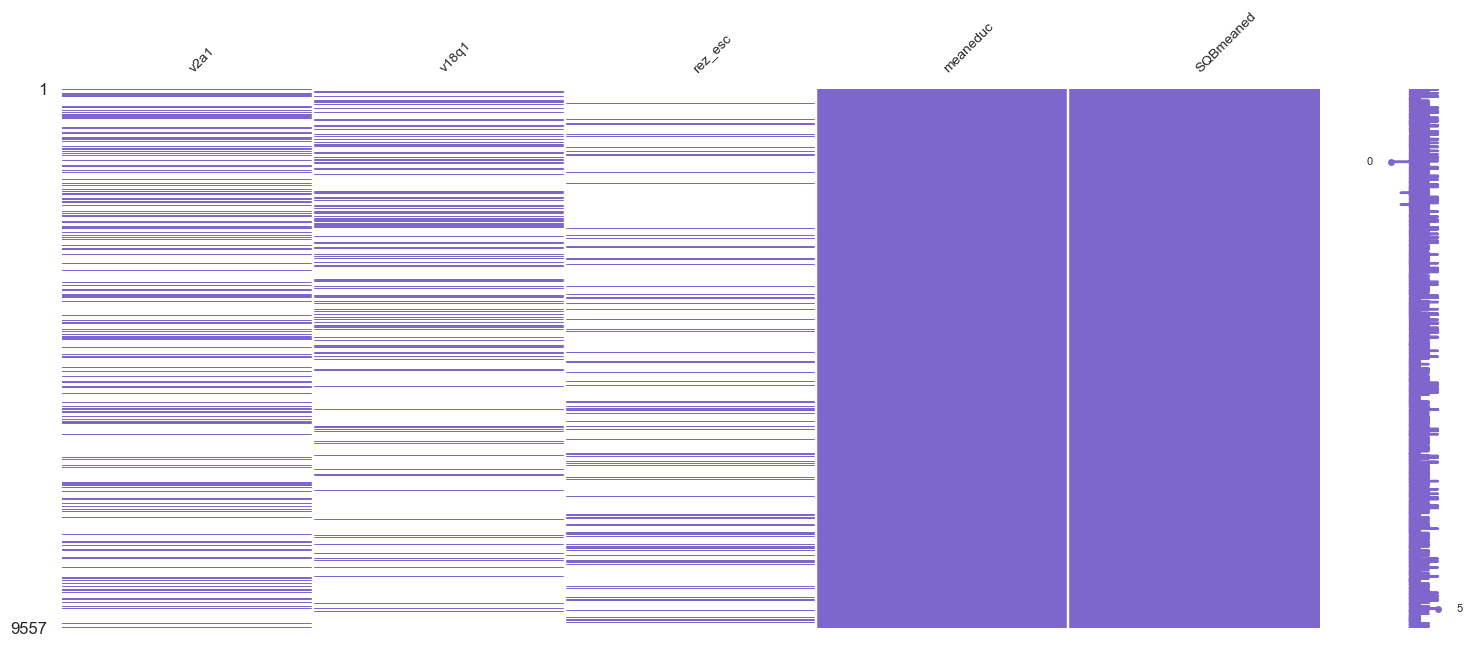

In [138]:
msno.matrix(df[Missing_cols],
           figsize = (18,7),
           fontsize = 10,
           color = (0.5,0.4, 0.8));

## Remove Columns with Missing Values

In [139]:
df.drop(Missing_cols, axis =1, inplace=True)

In [140]:
df.shape

(9557, 138)

In [141]:
df_dtypes = df.dtypes.reset_index()
df_dtypes.columns = ["col_names", "col_type"]
print(df_dtypes)

           col_names col_type
0                 Id   object
1             hacdor    int64
2              rooms    int64
3             hacapo    int64
4               v14a    int64
..               ...      ...
133     SQBhogar_nin    int64
134  SQBovercrowding  float64
135    SQBdependency  float64
136            agesq    int64
137           Target    int64

[138 rows x 2 columns]


In [142]:
df_dtypes.groupby("col_type").size()

col_type
int64      130
float64      3
object       5
dtype: int64

## Cardinality

In [143]:
obj_cols = df.select_dtypes(include=['object']).columns

In [185]:
df_obj = df[obj_cols]

In [187]:
df_obj.shape

(9557, 5)

In [144]:
df[obj_cols].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [145]:
for col in obj_cols:
    print('unique value in columns: {} = {}'.format(col, len(df[col].unique())))

unique value in columns: Id = 9557
unique value in columns: idhogar = 2988
unique value in columns: dependency = 31
unique value in columns: edjefe = 22
unique value in columns: edjefa = 22


In [146]:
import pandas_profiling as pp

In [147]:
num_cols = df.select_dtypes(exclude=['object']).columns
num_cols

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=133)

In [148]:
num_df = df[num_cols]

In [184]:
num_df.shape

(9557, 133)

In [149]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hacdor,9557.0,0.038087,0.191417,0.00,0.000000,0.000000,0.000000,1.0
rooms,9557.0,4.955530,1.468381,1.00,4.000000,5.000000,6.000000,11.0
hacapo,9557.0,0.023648,0.151957,0.00,0.000000,0.000000,0.000000,1.0
v14a,9557.0,0.994768,0.072145,0.00,1.000000,1.000000,1.000000,1.0
refrig,9557.0,0.957623,0.201459,0.00,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...
SQBhogar_nin,9557.0,3.844826,6.946296,0.00,0.000000,1.000000,4.000000,81.0
SQBovercrowding,9557.0,3.249485,4.129547,0.04,1.000000,2.250000,4.000000,36.0
SQBdependency,9557.0,3.900409,12.511831,0.00,0.111111,0.444444,1.777778,64.0
agesq,9557.0,1643.774302,1741.197050,0.00,289.000000,961.000000,2601.000000,9409.0


In [150]:
float_cols = df.select_dtypes(include=['float64']).columns

In [151]:
df[float_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
overcrowding,9557.0,1.605380,0.819946,0.20,1.000000,1.500000,2.000000,6.0
SQBovercrowding,9557.0,3.249485,4.129547,0.04,1.000000,2.250000,4.000000,36.0
SQBdependency,9557.0,3.900409,12.511831,0.00,0.111111,0.444444,1.777778,64.0


In [152]:
float_df = df[float_cols]
float_df.head()

,overcrowding,SQBovercrowding,SQBdependency
0,1.000000,1.000000,0.0
1,1.000000,1.000000,64.0
2,0.500000,0.250000,64.0
3,1.333333,1.777778,1.0
4,1.333333,1.777778,1.0


In [153]:
Q1 = float_df.quantile(0.25)
Q3 = float_df.quantile(0.75)
IQR = Q3 -Q1
print(IQR)

overcrowding       1.000000
SQBovercrowding    3.000000
SQBdependency      1.666667
dtype: float64


In [154]:
init = False

for col_name in list(float_df.columns):
    
    low =  Q1[col_name] -1.5 *IQR[col_name]
    high = Q3[col_name] +1.5 *IQR[col_name]
    
    query_string = '{} < @low or {} > @high'.format(col_name, col_name)
    
    outlier_arr_loop = float_df.query(query_string).index
    
    if not init:
        outlier_arr = outlier_arr_loop
        init = True
        
    outlier_arr = outlier_arr.union(outlier_arr_loop)

In [155]:
len(outlier_arr)

1527

In [156]:
float_df.skew(axis = 0)

overcrowding       1.889641
SQBovercrowding    4.186951
SQBdependency      4.404052
dtype: float64

## Poverty Level

In [157]:
df.shape

(9557, 138)

In [158]:
len(df['idhogar'].unique())

2988

In [159]:
df.groupby(['idhogar', 'Target']).size().unstack()

Target,1,2,3,4
idhogar,,,,
001ff74ca,NaN,NaN,NaN,2.0
003123ec2,NaN,4.0,NaN,NaN
004616164,NaN,2.0,NaN,NaN
004983866,NaN,NaN,2.0,NaN
005905417,NaN,3.0,NaN,NaN
...,...,...,...,...
ff9343a35,NaN,NaN,NaN,4.0
ff9d5ab17,NaN,NaN,NaN,3.0
ffae4a097,NaN,NaN,NaN,2.0


In [160]:
df.groupby(['idhogar', 'Target']).size().unstack().fillna(0).sample(10)

Target,1,2,3,4
idhogar,,,,
1c2e74d9b,0.0,0.0,2.0,0.0
e7a5ae0df,0.0,0.0,0.0,4.0
1ed926340,9.0,0.0,0.0,0.0
fbd0947cf,3.0,0.0,0.0,0.0
104578907,0.0,2.0,0.0,0.0
5bea5ec89,2.0,0.0,0.0,0.0
f48d96a60,0.0,3.0,0.0,0.0
73c0fa97e,2.0,0.0,0.0,0.0
141ac6fb3,0.0,0.0,1.0,0.0


In [161]:
df_family_level = df.groupby(['idhogar', 'Target']).size().unstack().reset_index()
df_family_level.head()

Target,idhogar,1,2,3,4
0,001ff74ca,NaN,NaN,NaN,2.0
1,003123ec2,NaN,4.0,NaN,NaN
2,004616164,NaN,2.0,NaN,NaN
3,004983866,NaN,NaN,2.0,NaN
4,005905417,NaN,3.0,NaN,NaN


In [162]:
df_family_level.columns

Index(['idhogar', 1, 2, 3, 4], dtype='object', name='Target')

In [163]:
column_names = ['FamilyID', 'Level1', 'Level2', 'Level3' ,'Level4']
df_family_level.columns =column_names
df_family_level.head()

,FamilyID,Level1,Level2,Level3,Level4
0,001ff74ca,NaN,NaN,NaN,2.0
1,003123ec2,NaN,4.0,NaN,NaN
2,004616164,NaN,2.0,NaN,NaN
3,004983866,NaN,NaN,2.0,NaN
4,005905417,NaN,3.0,NaN,NaN


In [164]:
df_family_level.fillna(0, inplace=True)

In [165]:
df_family_level['Total_Levels'] = (df_family_level.Level1 
                                   + df_family_level.Level2
                                   + df_family_level.Level3
                                   + df_family_level.Level4)

In [166]:
df_family_level.head(10)

,FamilyID,Level1,Level2,Level3,Level4,Total_Levels
0,001ff74ca,0.0,0.0,0.0,2.0,2.0
1,003123ec2,0.0,4.0,0.0,0.0,4.0
2,004616164,0.0,2.0,0.0,0.0,2.0
3,004983866,0.0,0.0,2.0,0.0,2.0
4,005905417,0.0,3.0,0.0,0.0,3.0
5,006031de3,0.0,0.0,0.0,4.0,4.0
6,006555fe2,0.0,0.0,0.0,5.0,5.0
7,00693f597,0.0,0.0,0.0,4.0,4.0
8,006b64543,0.0,0.0,0.0,2.0,2.0
9,00941f1f4,4.0,0.0,0.0,0.0,4.0


In [167]:
Q5
parentesco1

SyntaxError: invalid syntax (<ipython-input-167-10c2701b858c>, line 2)

In [ ]:
Q6 

In [122]:
#df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                  'B': [1,2,3,4,5,6],
                  'C': [2.0,5.0, 8., 1.,2,9]})
df

,A,B,C
0,foo,1,2.0
1,bar,2,5.0
2,foo,3,8.0
3,bar,4,1.0
4,foo,5,2.0
5,bar,6,9.0


In [123]:
grouped = df.groupby('A')


In [124]:
grouped.filter(lambda x : x['B'].mean() >2)

,A,B,C
0,foo,1,2.0
1,bar,2,5.0
2,foo,3,8.0
3,bar,4,1.0
4,foo,5,2.0
5,bar,6,9.0


In [114]:
df1 = pd.DataFrame({'Id': [100,100,100,200,300,300],
                   'Target': [1,2,3,4,1,2]})

df2 = pd.DataFrame({'Id': [100,200],
                   'Target': [1,1]})

print(df1)
print(df2)

    Id  Target
0  100       1
1  100       2
2  100       3
3  200       4
4  300       1
5  300       2
    Id  Target
0  100       1
1  200       1


In [171]:
df.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
      dtype='object', length=138)

In [ ]:
df.parentesco1

In [173]:
grouped = df.groupby('idhogar')

grouped.apply(lambda x : x[x['parentesco1'] != 1]['parentesco1'])

idhogar        
001ff74ca  7471    0
003123ec2  8159    0
           8161    0
           8162    0
004616164  6473    0
                  ..
ffe90d46f  9350    0
           9351    0
fff7d6be1  5948    0
           5949    0
           5951    0
Name: parentesco1, Length: 6584, dtype: int64

In [175]:
X = num_df.drop('Target',axis=1)
y = df['Target']

In [177]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state = 110)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,  random_state = 11)
print(len(X_train))
print(len(X_test))
#train_size

6689
2868


In [189]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [190]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [192]:
predictions = rfc.predict(X_test)
accuracy_test =accuracy_score(y_test,predictions)
print("----------------test Accuracy------------------------")
print(accuracy_test)
print("---------------confusion matrix--------------------")

conf_matrix=confusion_matrix(y_test,predictions)
print(conf_matrix)

print("-------------classification report------------------")
print(classification_report(y_test,predictions))

----------------test Accuracy------------------------
0.902370990237099
---------------confusion matrix--------------------
[[ 157   15    0   37]
 [   8  371   12   89]
 [   0   11  234  102]
 [   0    2    4 1826]]
-------------classification report------------------
              precision    recall  f1-score   support

           1       0.95      0.75      0.84       209
           2       0.93      0.77      0.84       480
           3       0.94      0.67      0.78       347
           4       0.89      1.00      0.94      1832

    accuracy                           0.90      2868
   macro avg       0.93      0.80      0.85      2868
weighted avg       0.91      0.90      0.90      2868



In [194]:
predictions_train = rfc.predict(X_train)
accuracy_train =accuracy_score(y_train,predictions_train)
print("-------------------Accuracy------------------------")
print(accuracy_train)
print("---------------confusion matrix--------------------")

conf_matrix_train=confusion_matrix(y_train,predictions_train)
print(conf_matrix_train)

print("-------------classification report------------------")
print(classification_report(y_train,predictions_train))

-------------------Accuracy------------------------
1.0
---------------confusion matrix--------------------
[[ 546    0    0    0]
 [   0 1117    0    0]
 [   0    0  862    0]
 [   0    0    0 4164]]
-------------classification report------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       546
           2       1.00      1.00      1.00      1117
           3       1.00      1.00      1.00       862
           4       1.00      1.00      1.00      4164

    accuracy                           1.00      6689
   macro avg       1.00      1.00      1.00      6689
weighted avg       1.00      1.00      1.00      6689

